Data Loading with Kaggle

In [1]:
IMAGE_SIZE = 128
NR_OF_EPOCHS = 50

In [4]:
!pip install diffusers

  Using cached diffusers-0.27.2-py3-none-any.whl.metadata (18 kB)
Using cached diffusers-0.27.2-py3-none-any.whl (2.0 MB)


In [3]:
import torch
from diffusers import DDPMPipeline

# We can set the device to either use our GPU or use our CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
device

device(type='cuda', index=0)

In [3]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [8]:
!kaggle datasets download -d jhoward/lsun_bedroom

Dataset URL: https://www.kaggle.com/datasets/jhoward/lsun_bedroom
License(s): ODbL-1.0




  0%|          | 0.00/8.89G [00:00<?, ?B/s]
  0%|          | 1.00M/8.89G [00:00<1:32:52, 1.71MB/s]
  0%|          | 2.00M/8.89G [00:00<47:18, 3.36MB/s]  
  0%|          | 5.00M/8.89G [00:00<17:55, 8.88MB/s]
  0%|          | 9.00M/8.89G [00:00<09:52, 16.1MB/s]
  0%|          | 13.0M/8.89G [00:01<07:13, 22.0MB/s]
  0%|          | 17.0M/8.89G [00:01<06:01, 26.4MB/s]
  0%|          | 21.0M/8.89G [00:01<05:30, 28.8MB/s]
  0%|          | 25.0M/8.89G [00:01<04:59, 31.8MB/s]
  0%|          | 29.0M/8.89G [00:01<04:40, 33.9MB/s]
  0%|          | 33.0M/8.89G [00:01<04:25, 35.8MB/s]
  0%|          | 37.0M/8.89G [00:01<04:26, 35.7MB/s]
  0%|          | 41.0M/8.89G [00:01<04:39, 34.1MB/s]
  0%|          | 45.0M/8.89G [00:01<04:24, 35.9MB/s]
  1%|          | 49.0M/8.89G [00:02<04:18, 36.8MB/s]
  1%|          | 53.0M/8.89G [00:02<04:09, 38.1MB/s]
  1%|          | 57.0M/8.89G [00:02<04:05, 38.7MB/s]
  1%|          | 61.0M/8.89G [00:02<03:59, 39.6MB/s]
  1%|          | 65.0M/8.89G [00:02<04:11, 37.8MB/

In [4]:
!unzip lsun_bedroom

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import os
import shutil

# Define the source directory and the target directory
source_dir = 'data0/lsun/bedroom'
target_dir = 'C:/Users/Filip/Desktop/PW/2 semestr/Deep Learning/pro3/content/training'


# Traverse through all subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    print(f'Checking directory {root}...')
    for file in files:
        # If the file is an image, move it to the target directory
        if file.endswith('.jpg') or file.endswith('.png'):
            print(f'Moving file {file}...')
            shutil.move(os.path.join(root, file), target_dir)

# Create a zip archive of the target directory
#shutil.make_archive('/content/training_zipped', 'zip', target_dir)

Checking directory data0/lsun/bedroom...
Checking directory data0/lsun/bedroom\0...
Checking directory data0/lsun/bedroom\0\0...
Checking directory data0/lsun/bedroom\0\0\0...
Checking directory data0/lsun/bedroom\0\0\1...
Checking directory data0/lsun/bedroom\0\0\2...
Checking directory data0/lsun/bedroom\0\0\3...
Checking directory data0/lsun/bedroom\0\0\4...
Checking directory data0/lsun/bedroom\0\0\5...
Checking directory data0/lsun/bedroom\0\0\6...
Checking directory data0/lsun/bedroom\0\0\7...
Checking directory data0/lsun/bedroom\0\0\8...
Checking directory data0/lsun/bedroom\0\0\9...
Checking directory data0/lsun/bedroom\0\0\a...
Checking directory data0/lsun/bedroom\0\0\b...
Checking directory data0/lsun/bedroom\0\0\c...
Checking directory data0/lsun/bedroom\0\0\d...
Checking directory data0/lsun/bedroom\0\0\e...
Checking directory data0/lsun/bedroom\0\0\f...
Checking directory data0/lsun/bedroom\0\1...
Checking directory data0/lsun/bedroom\0\1\0...
Checking directory data0/ls

In [7]:
import os
import shutil

# Define the source directory and the target directory
source_dir = '/content/training/'
target_dir = '/content/sample1000/'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Initialize a counter for the number of images moved
count = 0

# Traverse through all subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # If the file is an image, move it to the target directory
        if file.endswith('.jpg') or file.endswith('.png'):
            shutil.move(os.path.join(root, file), target_dir)
            count += 1
            # If we've moved 1000 images, stop
            if count >= 10000:
                break
    # If we've moved 1000 images, stop
    if count >= 10000:
        break

In [5]:
import os

DIR = '/content/sample1000'
print( len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

10000


Checking for small sample - 89 images

What data augemntataion we can apply, if that even will be changing

In [6]:
from torchvision import transforms

image_size = IMAGE_SIZE

# Define data augmentations
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)

In [7]:
from torch.utils.data import Dataset
from torchvision.transforms import Compose, ToTensor
from PIL import Image
import os

batch_size = 16


class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_filenames = os.listdir(image_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Define the directory where your images are stored
image_dir = '/content/sample1000'

# Define the transformation to preprocess images and convert them to tensors
transform = preprocess

# Load the images into a dataset
dataset = CustomImageDataset(image_dir, transform=transform)


train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

In [8]:
#Check if images are loading correctly ADD displaying images
batch = next(iter(train_dataloader))

In [9]:
from diffusers import DDPMScheduler

# We'll learn about beta_start and beta_end in the next sections
scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_start=0.001, beta_end=0.02
)
timesteps = torch.linspace(0, 999, 8).long()

# We load 8 images from the dataset and
# add increasing amounts of noise to them
x = batch[:8]
noise = torch.rand_like(x)
noised_x = scheduler.add_noise(x, noise, timesteps)

In [10]:
noised_x

tensor([[[[ 6.3016e-01,  6.0690e-01,  4.4263e-01,  ...,  3.3449e-01,
            3.4726e-01,  3.3675e-01],
          [ 6.5287e-01,  6.1284e-01,  4.9045e-01,  ...,  3.5948e-01,
            3.4453e-01,  3.3535e-01],
          [ 6.7632e-01,  6.2906e-01,  5.3449e-01,  ...,  3.6117e-01,
            3.5621e-01,  3.5465e-01],
          ...,
          [-6.0907e-01, -7.3228e-01, -7.6968e-01,  ..., -7.8200e-01,
           -7.6781e-01, -7.7546e-01],
          [-7.4081e-01, -7.8737e-01, -8.2314e-01,  ..., -7.7948e-01,
           -7.5655e-01, -7.7082e-01],
          [-8.2755e-01, -8.4500e-01, -8.7066e-01,  ..., -7.5300e-01,
           -7.7033e-01, -7.6416e-01]],

         [[ 7.0167e-01,  6.9781e-01,  5.5833e-01,  ...,  3.8641e-01,
            3.6827e-01,  3.7934e-01],
          [ 7.2502e-01,  6.9446e-01,  6.3783e-01,  ...,  3.8702e-01,
            3.8882e-01,  3.9323e-01],
          [ 7.1824e-01,  7.0074e-01,  6.4914e-01,  ...,  3.7396e-01,
            3.6504e-01,  3.8549e-01],
          ...,
     

In [20]:
import numpy as np
import matplotlib.pyplot as plt
def show_images(noised_x):
    noised_x = noised_x.detach().cpu().numpy()
    noised_x = np.transpose(noised_x, (0, 2, 3, 1))  # reshape from (batch, channels, height, width) to (batch, height, width, channels)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(np.concatenate([np.pad(img, ((2, 2), (2, 2), (0, 0)), mode='constant', constant_values=1)
                              for img in noised_x], axis=1))

In [21]:
show_images(batch[:8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


: 

In [1]:
show_images(noised_x)

NameError: name 'show_images' is not defined

In [11]:
from diffusers import UNet2DModel

# Create a UNet2DModel
model = UNet2DModel(
    in_channels=3,  # 3 channels for RGB images
    sample_size=64,  # Specify our input size
    # The number of channels per block affects the model size
    block_out_channels=(64, 128, 256, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=("AttnUpBlock2D", "AttnUpBlock2D", "UpBlock2D", "UpBlock2D"),
).to(device)

# Pass a batch of data through to see it works
with torch.no_grad():
    out = model(noised_x.to(device), timestep=timesteps.to(device)).sample

out.shape

c:\Users\Filip\anaconda3\Lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


torch.Size([8, 3, 128, 128])

In [13]:
from torch.nn import functional as F
from tqdm import tqdm

num_epochs = NR_OF_EPOCHS  # How many runs through the data should we do?
lr = 1e-4  # What learning rate should we use
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
losses = []  # Somewhere to store the loss values for later plotting

# Train the model (this takes a while!)
for epoch in range(num_epochs):
    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for batch in progress_bar:
        # Load the input images
        clean_images = batch.to(device)

        # Sample noise to add to the images
        noise = torch.randn(clean_images.shape).to(device)

        # Sample a random timestep for each image
        timesteps = torch.randint(
            0,
            scheduler.config.num_train_timesteps,
            (clean_images.shape[0],),
            device=device,
        ).long()

        # Add noise to the clean images according
        # to the noise magnitude at each timestep
        noisy_images = scheduler.add_noise(clean_images, noise, timesteps)

        # Get the model prediction for the noise
        # The model also uses the timestep as an input
        # for additional conditioning
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]

        # Compare the prediction with the actual noise
        loss = F.mse_loss(noise_pred, noise)

        # Store the loss for later plotting
        losses.append(loss.item())

        # Update the model parameters with the optimizer based on this loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Update the progress bar with the current loss value
        progress_bar.set_postfix({'loss': loss.item()})


Epoch 50/50: 100%|██████████| 625/625 [1:11:39<00:00,  6.88s/it, loss=0.00269]


In [15]:
from matplotlib import pyplot as plt

plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training loss")
plt.xlabel("Training step")

plt.subplot(1, 2, 2)
plt.plot(range(400, len(losses)), losses[400:])
plt.title("Training loss from step 400")
plt.xlabel("Training step");


: 

In [20]:
pipeline = DDPMPipeline(unet=model, scheduler=scheduler)
ims = pipeline(batch_size=4).images
ims
#show_images(ims, nrows=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>]

In [21]:
import matplotlib.pyplot as plt

def show_images_PIL(images):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 20))
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')

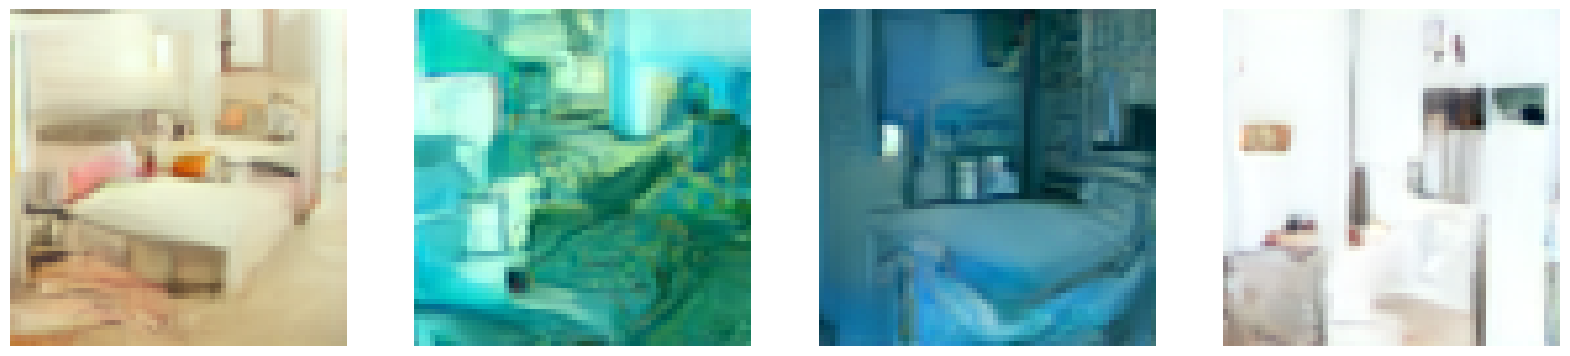

In [22]:
# Convert the tensors back to PIL Images
#images = [transforms.ToPILImage()(img) for img in ims]

# Display the images
show_images_PIL(ims)

In [14]:
torch.save(model.state_dict(), 'C:/Users/Filip/Desktop/PW/2 semestr/Deep Learning/pro3/model128x128.pt')